In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Financial_inclusion_dataset.csv')

In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
duplicates = df.duplicated()
duplicates.sum()

np.int64(0)

In [8]:
df.isna().sum().sort_values(ascending=False)

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
#encoding categorical variables
df['country'] = le.fit_transform(df['country'])
df['relationship_with_head'] = le.fit_transform(df['relationship_with_head'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['education_level'] = le.fit_transform(df['education_level'])
df['job_type'] = le.fit_transform(df['job_type'])
df['gender_of_respondent'] = le.fit_transform(df['gender_of_respondent'])
df['cellphone_access'] = le.fit_transform(df['cellphone_access'])
df['location_type'] = le.fit_transform(df['location_type'])
df['bank_account'] = le.fit_transform(df['bank_account'])
df['uniqueid'] = le.fit_transform(df['uniqueid'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int64
 1   year                    23524 non-null  int64
 2   uniqueid                23524 non-null  int64
 3   bank_account            23524 non-null  int64
 4   location_type           23524 non-null  int64
 5   cellphone_access        23524 non-null  int64
 6   household_size          23524 non-null  int64
 7   age_of_respondent       23524 non-null  int64
 8   gender_of_respondent    23524 non-null  int64
 9   relationship_with_head  23524 non-null  int64
 10  marital_status          23524 non-null  int64
 11  education_level         23524 non-null  int64
 12  job_type                23524 non-null  int64
dtypes: int64(13)
memory usage: 2.3 MB


In [12]:
X = df[['country', 'cellphone_access', 'age_of_respondent', 'household_size', 'marital_status',
        'education_level', 'job_type', 'location_type', 'gender_of_respondent']]
y = df['bank_account']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,                
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1           
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.8858860489775381


In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.2,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model.pkl", "rb") as f:
    model = pickle.load(f)    

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8890620572400113

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6073
           1       0.71      0.35      0.47       985

    accuracy                           0.89      7058
   macro avg       0.80      0.66      0.70      7058
weighted avg       0.88      0.89      0.87      7058


Confusion Matrix:
 [[5930  143]
 [ 640  345]]


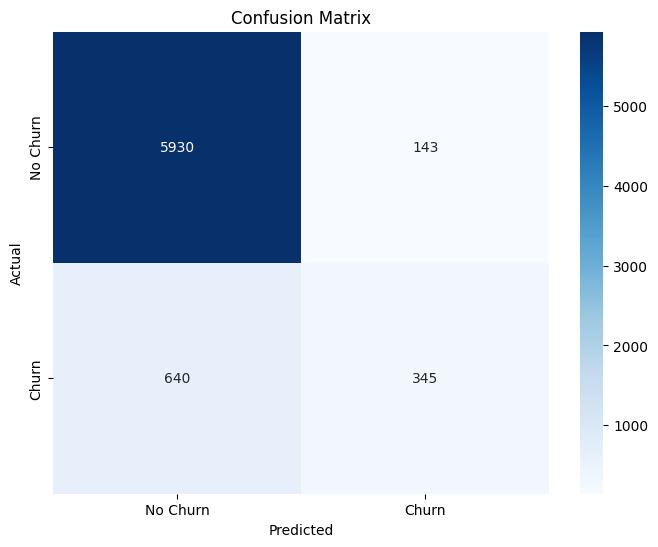

In [17]:
#ploting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
